#   Task1 
###  Oasis Infobyte Data Science Internship
####    Iris Flower Classification
#####              Tridib Dalui

In [18]:
#import main 2 libraries

import numpy as np
import pandas as pd

In [19]:
#reading the data

data=pd.read_csv('iris.csv')

In [20]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Data Preprocessing 

In [21]:
data.shape

(150, 6)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [23]:
#to check how many types of flower present

data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [24]:
#we don't need the 1st column so let's drop that
data=data.iloc[:,1:]

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [26]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [27]:
#check for null values
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Data visulaization

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

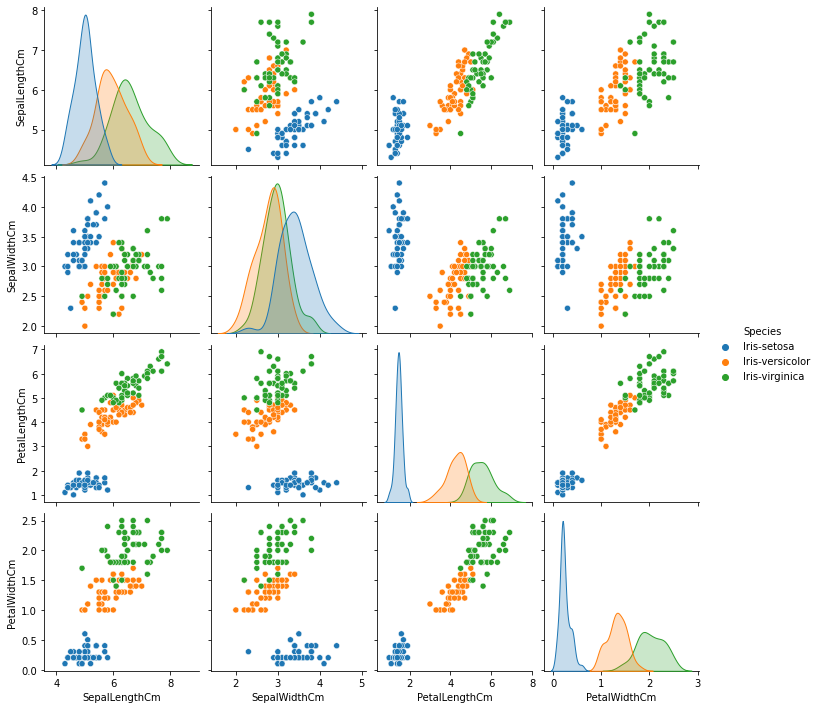

In [29]:
sns.pairplot(data,hue='Species')

<function matplotlib.pyplot.show(close=None, block=None)>

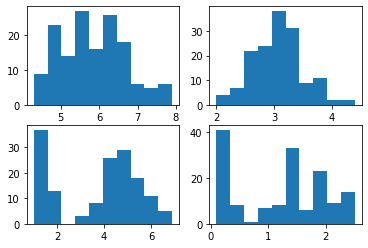

In [30]:
#histograms
plt.subplot(2,2,1)
plt.hist(data['SepalLengthCm'])
plt.subplot(2,2,2)
plt.hist(data['SepalWidthCm'])
plt.subplot(2,2,3)
plt.hist(data['PetalLengthCm'])
plt.subplot(2,2,4)
plt.hist(data['PetalWidthCm'])
plt.show

In [31]:
#scatter plots
colors=['yellow','lime','green']
species=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

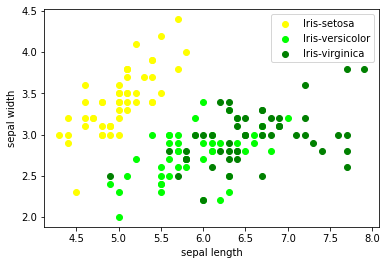

In [32]:
for i in range(3):
    x=data[data['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'], c=colors[i], label=species[i])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

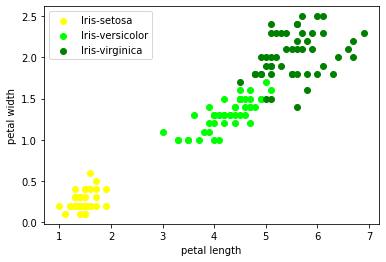

In [33]:
for i in range(3):
    x=data[data['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'], c=colors[i], label=species[i])
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()

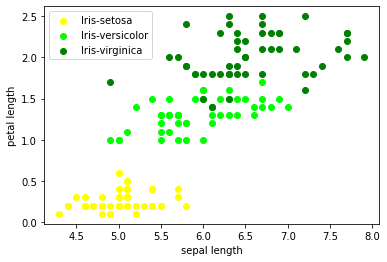

In [34]:
for i in range(3):
    x=data[data['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalWidthCm'], c=colors[i], label=species[i])
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend()

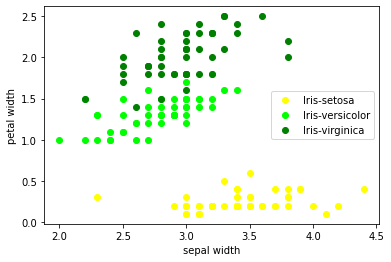

In [35]:
for i in range(3):
    x=data[data['Species']==species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'], c=colors[i], label=species[i])
plt.xlabel('sepal width')
plt.ylabel('petal width')
plt.legend()


In [36]:
# as the output is a classification of strings we need to import label encoder to make that numeric

from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data['Species']= le.fit_transform(data['Species'])
data['Species'].unique()
# 'Iris-setosa' == 0, 'Iris-versicolor' == 1, 'Iris-virginica' == 2

array([0, 1, 2])

In [37]:
#coorealation matrix

data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


#### Now we have to work with the cleaned data

In [38]:
# separating inputs & outputs

x=data.drop(columns=['Species'])
y=data['Species']

In [39]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [40]:
y.tail()

145    2
146    2
147    2
148    2
149    2
Name: Species, dtype: int32

In [41]:
#training and testing data prepration

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2)

In [42]:
x_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
107,7.3,2.9,6.3,1.8
40,5.0,3.5,1.3,0.3
128,6.4,2.8,5.6,2.1
106,4.9,2.5,4.5,1.7
98,5.1,2.5,3.0,1.1


In [43]:
y_test.head()

63     1
109    2
55     1
28     0
141    2
Name: Species, dtype: int32

#### Model making

In [44]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [45]:
column_trans=make_column_transformer((OneHotEncoder(sparse=False),[]),remainder='passthrough')
scaler=StandardScaler()

In [46]:
# KNN(k nearest neighbors) algorithm

from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
pipe = make_pipeline(column_trans,scaler,knn)
pipe.fit(x_train,y_train)
y_pred_knn= pipe.predict(x_test)
r2_score(y_test,y_pred_knn)

0.9542682926829268

In [47]:
#logistic regression algorithm

from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
pipe=make_pipeline(column_trans,scaler,lr)
pipe.fit(x_train,y_train)
y_pred_lr=pipe.predict(x_test)
r2_score(y_test,y_pred_lr)

0.9085365853658537

In [48]:
#as both the algorithm gives same o/p so we can use any of the algorithm

In [49]:
#testing the pipe is predicting or not

pipe.predict([[1.2,1.5,1.6,1.2]]) # ans is 0

array([0])

#### Model Making 

In [50]:
import pickle
pickle.dump(pipe,open('iris_flower.pkl','wb'))

## Thank You